In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# 读取excel文件并获取指定列
file_path = '../Data/福彩3D历史开奖.csv'
COLS_ALL = ['期号', '和值', '开奖号码']
df = pd.read_csv(file_path,usecols=COLS_ALL, encoding='GBK')
print('读取cvs文件: '+file_path)
print(df)




读取cvs文件: ../Data/福彩3D历史开奖.csv
           期号  开奖号码  和值
0     2024144   816  15
1     2024143   955  19
2     2024142   813  12
3     2024141   256  13
4     2024140   536  14
...       ...   ...  ..
3925  2013038   640  10
3926  2013037   364  13
3927  2013036   658  19
3928  2013033   277  16
3929  2013030   732  12

[3930 rows x 3 columns]


In [2]:
# 获取某一列的数据
COLS_Y = ['和值']
data = df[COLS_Y]
print(data)

      和值
0     15
1     19
2     12
3     13
4     14
...   ..
3925  10
3926  13
3927  19
3928  16
3929  12

[3930 rows x 1 columns]


d:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
2024-08-13 11:25:02.776 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.54616)
2024-08-13 11:25:03.035 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.545639)
2024-08-13 11:25:03.080 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewnorm distribution with error=0.546159)
2024-08-13 11:25:03.149 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.546148)
2024-08-13 11:25:03.226 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.546096)
2024-08-13 11

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.545639,753.797711,778.903289,inf,0.042287,1.522202e-06
lognorm,0.546096,751.119382,769.948566,inf,0.049611,7.599855e-09
gamma,0.546148,750.822747,769.651932,inf,0.050348,4.254948e-09
skewnorm,0.546159,750.777709,769.606893,inf,0.050783,3.008579e-09
norm,0.546160,748.775432,761.328221,inf,0.050804,2.959492e-09


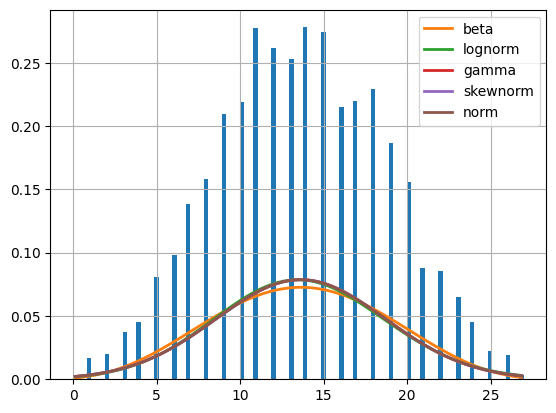

In [3]:
#2# 计算绘制参数

# 计算均值、标准差、中位数
mean = np.mean(data)
std = np.std(data)
median = np.median(data)

# 使用fitter库拟合多种分布
from fitter import Fitter
f = Fitter(data, distributions=['norm', 'skewnorm', 't', 'gamma', 'beta', 'lognorm'])
f.fit()
f.summary() #打印结果

最佳拟合分布名称: beta
最佳拟合分布参数: {'a': 4.617466321618899, 'b': 4.621273149486374, 'loc': -2.592476084378255, 'scale': 32.495041970678095}


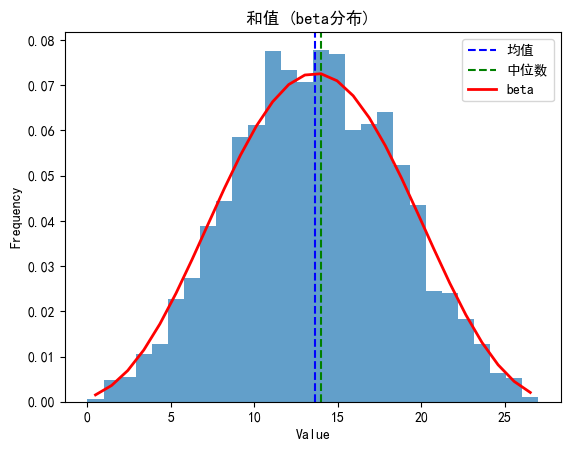

In [8]:
#3# 绘制直方图

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.axvline(mean, color='b', linestyle='--', label='均值') # 绘制均值线（红色线）
plt.axvline(median, color='g', linestyle='--', label='中位数') # 绘制中位数线（绿色线）
                                                                # 绘制众数线(不用画，看最高的直方柱即是)
plt.hist(data, bins=28, density=True, alpha=0.7) # 绘制直方图

# 获取最佳拟合分布的名称和参数
best_fit = f.get_best(method='sumsquare_error')
best_fit_name = list(best_fit.keys())[0]
best_fit_params = best_fit[best_fit_name]
# 打印调试信息
print("最佳拟合分布名称:", best_fit_name)
print("最佳拟合分布参数:", best_fit_params)
      
from scipy.stats import norm, skewnorm, t, gamma, beta, lognorm

# 创建映射从分布名称到实际的分布对象
distribution_map = {
    'norm': norm,
    'skewnorm': skewnorm,
    't': t,
    'gamma': gamma,
    'beta': beta,
    'lognorm': lognorm
}
# 计算直方图相关参数
hist, bins = np.histogram(data, bins=28, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# 计算拟合曲线的值
bin_centers = (bins[1:] + bins[:-1]) / 2
dist = distribution_map[best_fit_name]
pdf_values = dist.pdf(bin_centers, **best_fit_params)

plt.plot(bin_centers, pdf_values, 'r-', lw=2, label=best_fit_name) # 绘制拟合曲线
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('和值'+' ('+best_fit_name+'分布) ')
plt.legend()
plt.show()